In [108]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [110]:
data = pd.read_csv('data/INCHENAI.txt', names=['Month', 'Day', 'Year', 'Temp'], delim_whitespace=True)
data

,Month,Day,Year,Temp
0,1,1,1995,72.4
1,1,2,1995,73.5
2,1,3,1995,72.6
3,1,4,1995,75.2
4,1,5,1995,74.8
...,...,...,...,...
9261,5,9,2020,90.1
9262,5,10,2020,89.4
9263,5,11,2020,89.5
9264,5,12,2020,87.5


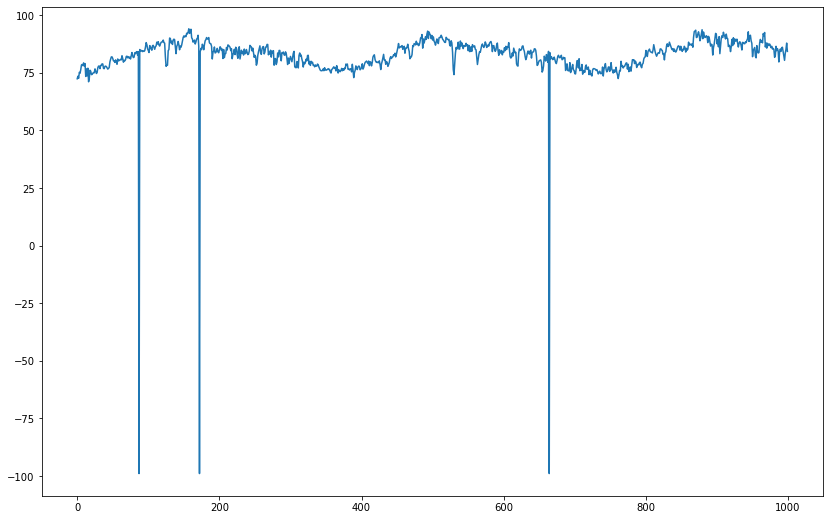

In [111]:
l = 0
r = 1000
plt.figure(figsize=(14, 9))
plt.plot(data.index[l:r], data['Temp'][l:r])

In [112]:
len(data[data['Temp']==-99])

29

In [113]:
for i in data[data['Temp']==-99].index:
    data['Temp'][i] = data['Temp'][i-1]
    

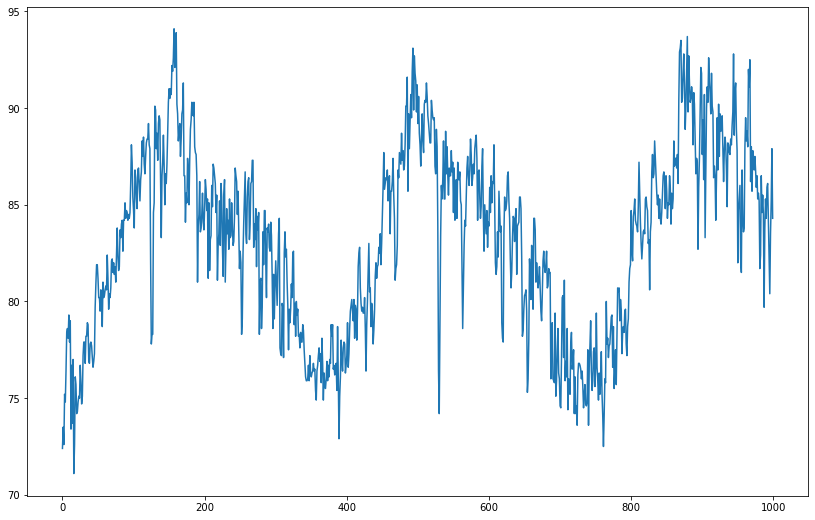

In [114]:
l = 0
r = 1000
plt.figure(figsize=(14, 9))
plt.plot(data.index[l:r], data['Temp'][l:r])

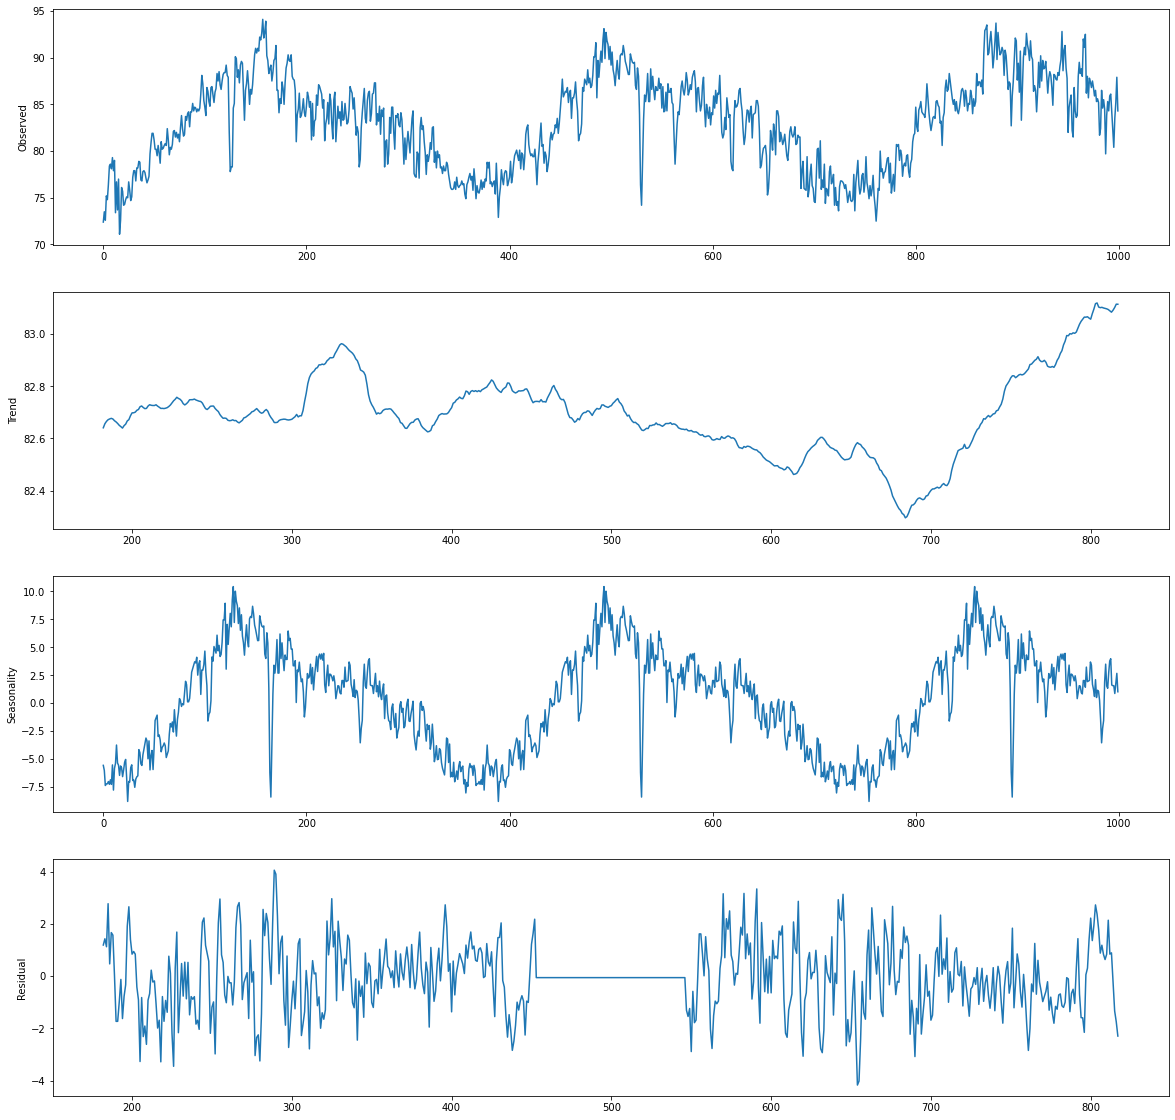

In [190]:
from statsmodels.tsa.seasonal import seasonal_decompose

l = 0
r = 1000
result = seasonal_decompose(data['Temp'][l:r], model='additive', period=365)

x = list(range(len(data)))[l:r]
plt.figure(figsize=(20, 20))
plt.subplot(4, 1, 1)
plt.ylabel('Observed')
plt.plot(x, result.observed)
plt.subplot(4, 1, 2)
plt.ylabel('Trend')
plt.plot(x, result.trend)
plt.subplot(4, 1, 3)
plt.ylabel('Seasonality')
plt.plot(x, result.seasonal)
plt.subplot(4, 1, 4)
plt.ylabel('Residual')
plt.plot(x, result.resid)
plt.show()